## Working with images I

In this exerciese your task is to train a NN that predicts the number written on an image. Befor trying anything complex, we will not treat the images as an 2D array but just a vector. The most building blocks for training the NN are already provided and you need to fill in the missing parts indidcated by:

'### Your Code ###'

Befor we start lets first import all the needed libraries.


In [ ]:

import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

The data you will work with will be provided by PyTorch as a pre-build dataset. This is a reare situation because we will not need to perform data pre-processing.

In [ ]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 78932481.36it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 70305103.79it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27522868.68it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10967489.22it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



To load the data in batches, PyTorch provides a `DataLoader`. This will take care of batching and shuffeling the data. But it can do much more things. If you are interested check out the [Documentation](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) to learn about its capabilities.

For now chose a batch_size between 16 and 256

In [ ]:
batch_size = 32
# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28])
Shape of y: torch.Size([32]) torch.int64


Before we start the training lets first visualize some images.

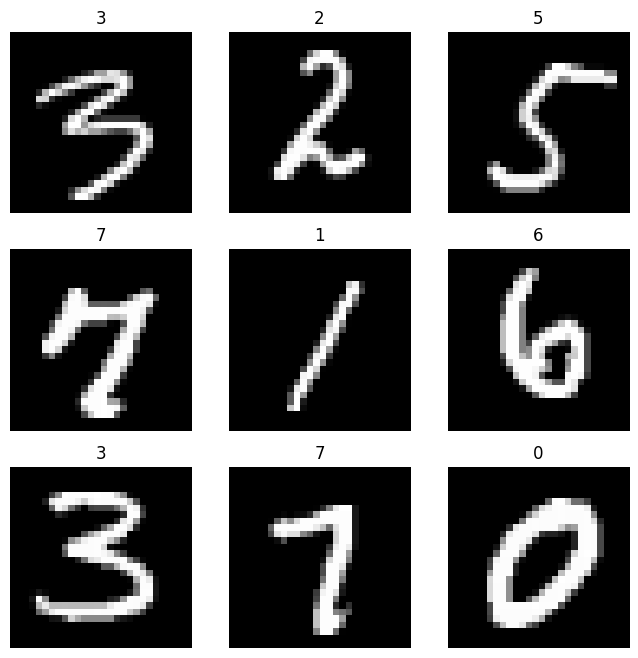

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

We can also just look at the raw image. Usually, an Image is an integer in [0, 255]. Since, we work with a curated dataset this has already been taken care of for us.

In [ ]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    train_loss, correct = 0., 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= num_batches
    correct /= size
    return (train_loss, correct)

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return (test_loss, correct)

In [ ]:
epochs = 25
train_acc = []
train_loss = []
test_acc = []
test_loss = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    loss, acc = train(train_dataloader, model, loss_fn, optimizer)
    train_loss.append(loss)
    train_acc.append(acc)
    loss, acc =test(test_dataloader, model, loss_fn)
    test_loss.append(loss)
    test_acc.append(acc)
print("Done!")

Epoch 1
-------------------------------
loss: 2.313142  [   32/60000]
loss: 2.295367  [ 3232/60000]
loss: 2.300972  [ 6432/60000]
loss: 2.301098  [ 9632/60000]
loss: 2.287854  [12832/60000]
loss: 2.290582  [16032/60000]
loss: 2.278044  [19232/60000]
loss: 2.277661  [22432/60000]
loss: 2.269910  [25632/60000]
loss: 2.257749  [28832/60000]
loss: 2.259546  [32032/60000]
loss: 2.267776  [35232/60000]
loss: 2.250130  [38432/60000]
loss: 2.240348  [41632/60000]
loss: 2.254157  [44832/60000]
loss: 2.213715  [48032/60000]
loss: 2.207172  [51232/60000]
loss: 2.217801  [54432/60000]
loss: 2.207716  [57632/60000]
Test Error: 
 Accuracy: 58.7%, Avg loss: 2.205216 

Epoch 2
-------------------------------
loss: 2.214801  [   32/60000]
loss: 2.208096  [ 3232/60000]
loss: 2.184340  [ 6432/60000]
loss: 2.187458  [ 9632/60000]
loss: 2.207377  [12832/60000]
loss: 2.190529  [16032/60000]
loss: 2.108564  [19232/60000]
loss: 2.136193  [22432/60000]
loss: 2.107033  [25632/60000]
loss: 2.049751  [28832/60000

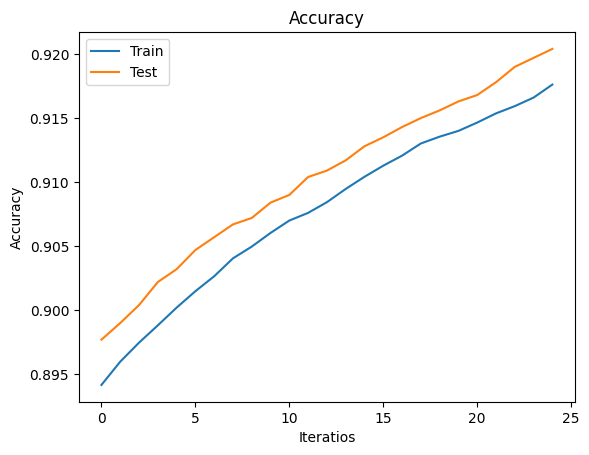

In [ ]:
plt.plot(list(range(len(train_acc))), train_acc, label="Train")
plt.plot(list(range(len(test_acc))), test_acc, label="Test")
plt.xlabel("Iteratios")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

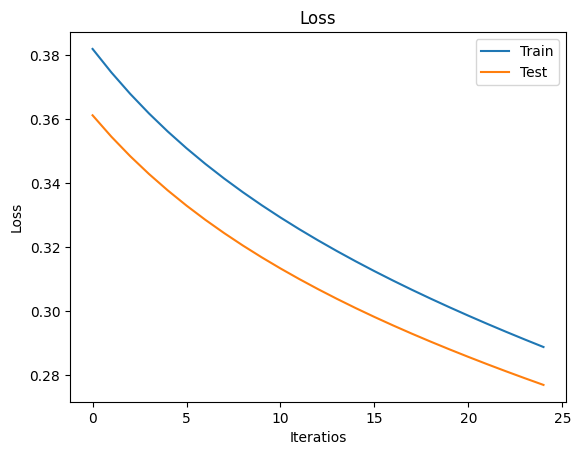

In [ ]:
plt.plot(list(range(len(train_loss))), train_loss, label="Train")
plt.plot(list(range(len(test_loss))), test_loss, label="Test")
plt.xlabel("Iteratios")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()
plt.show()